In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("height-weight.csv")

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

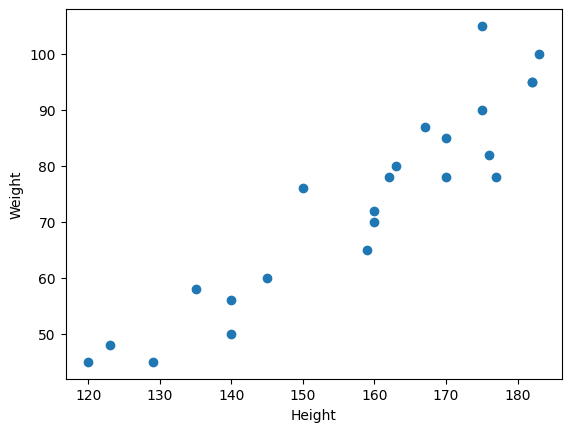

In [11]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

In [12]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


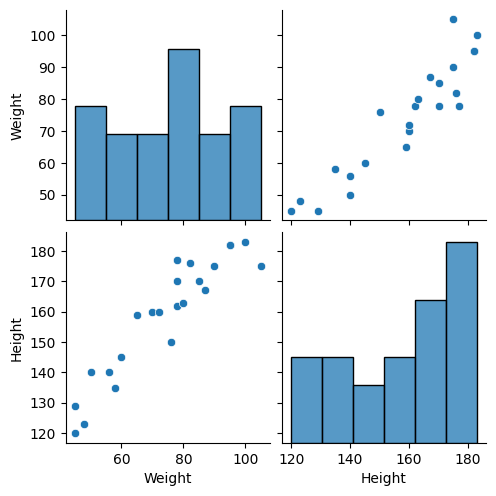

In [13]:
sns.pairplot(df)

In [22]:
# Independent an Dependent Features
x = df[['Weight']] # Independent feature
y = df[['Height']] # Dependent Feature

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
print("Coefficient or slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficient or slope:  [[17.2982057]]
Intercept:  [156.47058824]


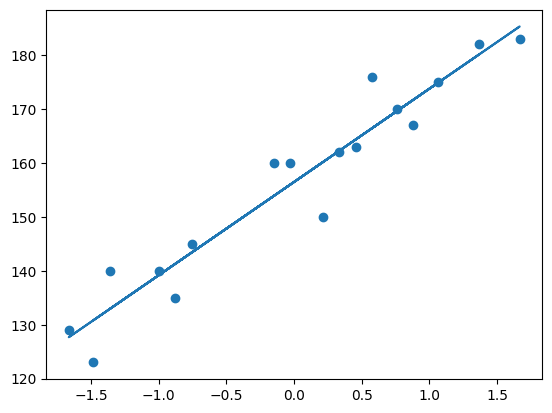

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))

In [32]:
y_pred = reg.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)

Mean Squared Error:  114.84069295228699
Mean Absolute Error:  9.66512588679501
Root Mean Squared Error:  10.716374991212605


In [35]:
from sklearn.metrics import r2_score

In [36]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


In [38]:
# Adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [43]:
# OLS Linear Regression
import statsmodels.api as sm

In [44]:
model = sm.OLS(y_train, x_train).fit()

In [45]:
prediction = model.predict(x_test)

In [46]:
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [47]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 11 Jul 2025   Prob (F-statistic):                       0.664
Time:                        20:42:11   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
